<a href="https://colab.research.google.com/github/Ecological-Complexity-Lab/link_prediction_project/blob/main/MLmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df_mandena = pd.read_csv('/content/drive/MyDrive/LinkPredictionProject/Data/ML_rattus_mandena.csv', encoding='latin1')
df_mandena.head()

,host_ID,asv_ID,Link,grid,pca_grid_attr,pca_grid_sm,season,elevation.obs,mass,sex,...,host_degree,host_betweenness,host_closeness,host_module,asv_degree,asv_betweenness,asv_closeness,asv_module,shortest_path,pref_attach
0,2010,ASV_1,1,brushy_regrowth,-0.197466,-2.224026,1,144.218796,80.0,female,...,12,0.003539,0.003651,1,129,0.050775,0.003051,1,1,1548
1,2011,ASV_1,1,brushy_regrowth,-0.197466,-2.224026,1,145.284958,51.0,male,...,13,0.002761,0.003479,1,129,0.050775,0.003051,1,1,1677
2,2013,ASV_1,0,brushy_regrowth,-0.197466,-2.224026,1,118.188316,88.0,female,...,18,0.004112,0.003691,1,129,0.050775,0.003051,1,3,2322
3,2014,ASV_1,1,brushy_regrowth,-0.197466,-2.224026,1,133.551437,77.0,male,...,20,0.004784,0.003758,1,129,0.050775,0.003051,1,1,2580
4,2015,ASV_1,1,brushy_regrowth,-0.197466,-2.224026,1,145.232788,65.0,female,...,6,0.004310,0.003472,1,129,0.050775,0.003051,1,1,774


## Data preprocessing

In [4]:
df_mandena_filtered = df_mandena[["asv_ID", "asv_degree", "grid", "season", "mass", "sex", "Link"]]
df_mandena_filtered.head()

,asv_ID,asv_degree,grid,season,mass,sex,Link
0,ASV_1,129,brushy_regrowth,1,80.0,female,1
1,ASV_1,129,brushy_regrowth,1,51.0,male,1
2,ASV_1,129,brushy_regrowth,1,88.0,female,0
3,ASV_1,129,brushy_regrowth,1,77.0,male,1
4,ASV_1,129,brushy_regrowth,1,65.0,female,1


In [5]:
# Convert "sex" column to numeric
df_mandena_filtered.loc[:, "sex"] = df_mandena_filtered["sex"].map({"female": 0, "male": 1})
# # Scale "mass", "asv_degree" columns
scaler = StandardScaler()
df_mandena_filtered.loc[:, "mass"] = scaler.fit_transform(df_mandena_filtered[["mass"]])
df_mandena_filtered.loc[:, "asv_degree"] = scaler.fit_transform(df_mandena_filtered[["asv_degree"]])

# Get dummies for "grid" column
df_mandena_filtered = pd.get_dummies(df_mandena_filtered, columns=["grid"], dtype="int", drop_first=True)

## Choosing a model

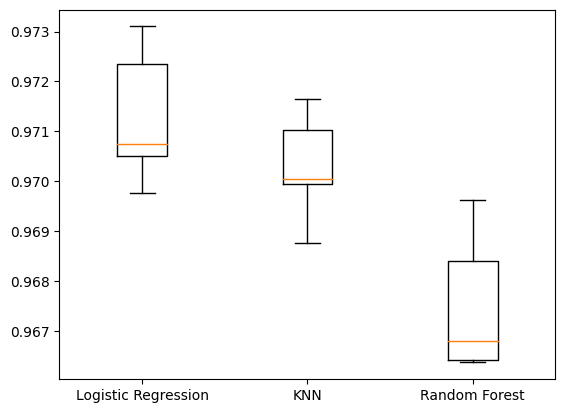

In [6]:
X = df_mandena_filtered.drop(["Link", "asv_ID"], axis=1)
y = df_mandena_filtered["Link"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
models = {
  "Logistic Regression": LogisticRegression(),
  "KNN": KNeighborsClassifier(),
  "Random Forest": RandomForestClassifier()
}
results = []

for model in models.values():
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  cv_results = cross_val_score(model, X_train, y_train, cv=kf)
  results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()

In [8]:
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  cr = classification_report(y_test, y_pred)

  print("The name of the model:", name)
  print("Accuracy on test set:", accuracy)
  print("Confusion Matrix:\n", cm)
  print("Classification Report:\n", cr)

The name of the model: Logistic Regression
Accuracy on test set: 0.9723669458550419
Confusion Matrix:
 [[44098   137]
 [ 1120   134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     44235
           1       0.49      0.11      0.18      1254

    accuracy                           0.97     45489
   macro avg       0.73      0.55      0.58     45489
weighted avg       0.96      0.97      0.96     45489

The name of the model: KNN
Accuracy on test set: 0.9711578623403461
Confusion Matrix:
 [[44087   148]
 [ 1164    90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     44235
           1       0.38      0.07      0.12      1254

    accuracy                           0.97     45489
   macro avg       0.68      0.53      0.55     45489
weighted avg       0.96      0.97      0.96     45489

The name of the model: Random Forest
Accuracy 